In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
data_dir = '/data/face'
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=1)

Found 11502 files belonging to 2 classes.


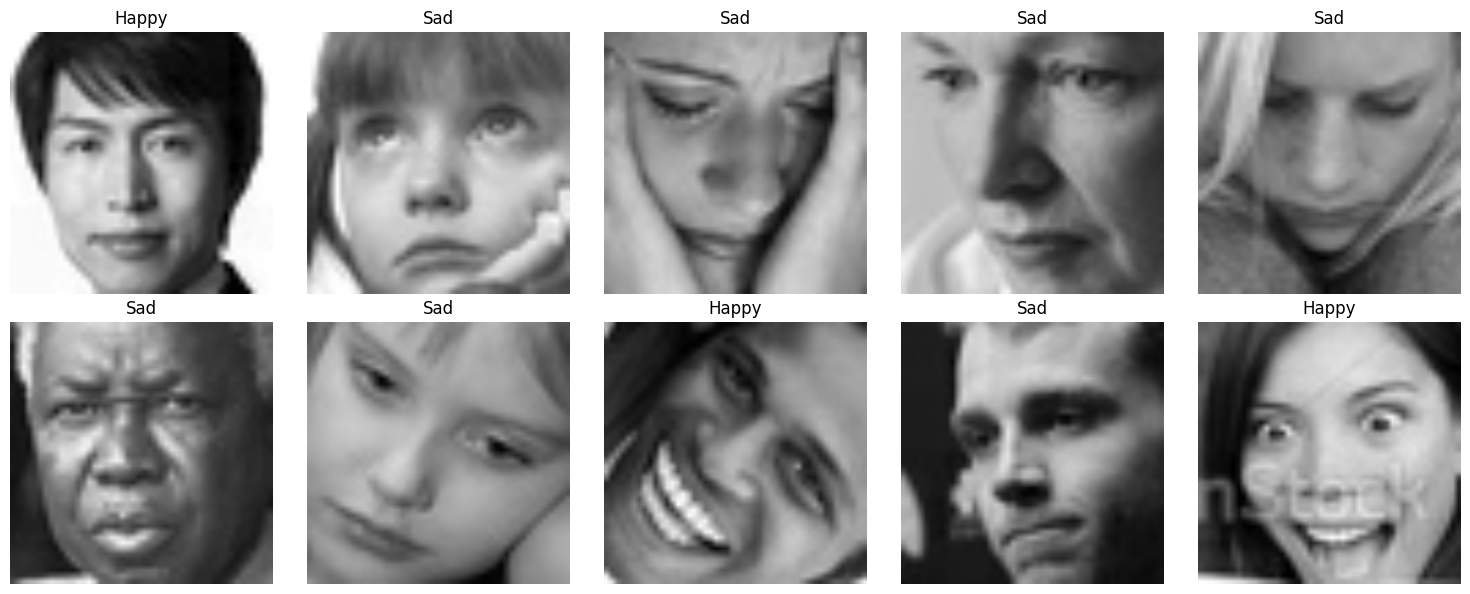

In [ ]:
def display_samples(dataset=data, n=10):
    rows = (n + 4) // 5
    plt.figure(figsize=(15, rows * 3))

    count = 0
    for batch_images, batch_labels in dataset:
        for image, label in zip(batch_images[:n], batch_labels[:n]):
            if count >= n:
                break
            ax = plt.subplot(rows, 5, count + 1)
            plt.imshow(image.numpy().astype("uint8"))
            plt.axis("off")  
            plt.title("Sad" if label.numpy() == 1 else "Happy")
            count += 1
        if count >= n:
            break

    plt.tight_layout()
    plt.show()

display_samples()

In [4]:
data_normalized = data.map(lambda x,y: (x/255, y))

In [5]:
def split_data(dataset, train_size=0.7, val_size=0.15):
    """
    Membagi dataset menjadi data latih, validasi, dan uji.
    
    Args:
        dataset: TensorFlow dataset.
        train_size: Proporsi data untuk latih.
        val_size: Proporsi data untuk validasi.
        
    Returns:
        data_train, data_val, data_test: Dataset yang sudah dibagi.
    """
    # Tentukan ukuran untuk train dan val (test akan menjadi sisanya)
    total_size = len(dataset)
    train_size = int(train_size * total_size)
    val_size = int(val_size * total_size)
    
    # Membagi dataset menjadi train, val, dan test
    train_data = dataset.take(train_size)
    temp_data = dataset.skip(train_size)
    
    val_data = temp_data.take(val_size)
    test_data = temp_data.skip(val_size)
    
    return train_data, val_data, test_data



# Membagi dataset
data_train, data_val, data_test = split_data(data_normalized)

In [6]:
base_model = MobileNetV2(
    weights='imagenet',       # Gunakan bobot yang sudah dilatih pada ImageNet
    include_top=False,        # Tidak menggunakan top layer (dense output layer)
    input_shape=(256, 256, 3) # Menyesuaikan ukuran input dengan model Anda
)


# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_18340\3077262495.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


In [7]:
model = Sequential([
    base_model,  # Menambahkan MobileNetV2 sebagai bagian dari model
    GlobalAveragePooling2D(),  # Menggunakan pooling untuk meratakan output dari MobileNetV2
    Dense(256, activation='relu'),  # Lapisan dense dengan 256 neuron
    Dense(1, activation='sigmoid')  # Lapisan output untuk klasifikasi biner (Happy/Sad)
])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,586,177 (9.87 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=10
)

Epoch 1/10
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 680s 83ms/step - accuracy: 0.7158 - loss: 0.5917 - val_accuracy: 0.7867 - val_loss: 0.4579
Epoch 2/10
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 666s 83ms/step - accuracy: 0.7905 - loss: 0.4427 - val_accuracy: 0.7954 - val_loss: 0.4376
Epoch 3/10
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 612s 76ms/step - accuracy: 0.8087 - loss: 0.4037 - val_accuracy: 0.7896 - val_loss: 0.4756
Epoch 4/10
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 613s 76ms/step - accuracy: 0.8277 - loss: 0.3736 - val_accuracy: 0.8046 - val_loss: 0.4387
Epoch 5/10
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 569s 71ms/step - accuracy: 0.8460 - loss: 0.3497 - val_accuracy: 0.8081 - val_loss: 0.4312
Epoch 6/10
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 576s 72ms/step - accuracy: 0.8551 - loss: 0.3210 - val_accuracy: 0.7913 - val_loss: 0.4716
Epoch 7/10
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 652s 81ms/step - accuracy: 0.8703 - loss: 0.3022 - val_accuracy: 0.7745 - val_loss: 0.5416
Epoch 8/10
8051/8051 ━━━━━━━━━━━━━━━━━━━━ 556s 69ms/step - accuracy: 

In [11]:
# Evaluasi Model
loss, accuracy = model.evaluate(data_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

1726/1726 ━━━━━━━━━━━━━━━━━━━━ 105s 55ms/step - accuracy: 0.7721 - loss: 0.7205
Test Loss: 0.6638, Test Accuracy: 0.8053


In [12]:
def plot_statistics(hist, metrics=['loss', 'accuracy']):
    plt.figure(figsize=(14, 6))
    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i + 1)
        plt.plot(hist.history[metric], label=metric, color='teal')
        plt.plot(hist.history[f'val_{metric}'], label=f'val_{metric}', color='orange')

        
        plt.title(f'{metric.capitalize()}', fontsize=16)
        plt.xlabel('Epochs', fontsize=12)
        plt.ylabel(f'{metric.capitalize()} Value', fontsize=12)

        
        plt.grid(True)
        plt.legend(loc="upper left")
        
    plt.tight_layout()  
    plt.show()

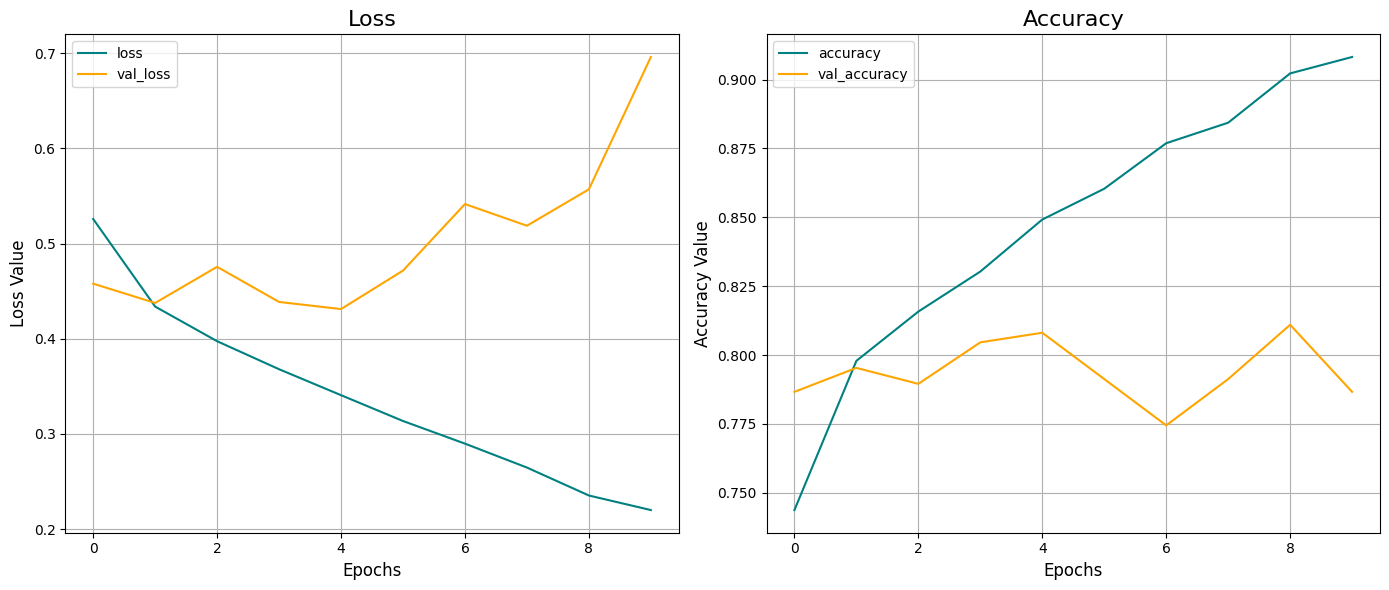

In [13]:
plot_statistics(history)

In [14]:
model.save('model_mobile80.h5')